In [205]:
"""DomiRank centrality."""

import networkx as nx
import numpy as np
import pandas as pd

import pickle  
from SpringRank import get_ranks
from loguru import logger

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
def load_benchmark_pickle_to_df(pickle_file):
    infile = open(pickle_file,'rb')  
    df = pickle.load(infile)
    return df

In [226]:
centralities = load_benchmark_pickle_to_df('/Users/m33040/Downloads/CommunityFitNet-master/Benchmark_updated/CommunityFitNet_updated_centralities.pickle')
centralities

,network_index,domirank sm sig,domirank lrg sig,degree,in_degree,out_degree,eigenvector,pagerank,springrank
0,0,"{0: 3.9999999986e-10, 1: 9.999999996e-11, 2: 6...","{0: 3.9999999986e-10, 1: 9.999999996e-11, 2: 6...","{0: 0.11428571428571428, 7: 0.0285714285714285...",,,"{0: 0.06013027686404005, 7: 0.0082094897010494...","{0: 0.033808838939479904, 7: 0.011350872883383...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,"{0: 4.999999996e-10, 1: 1.9999999980000001e-10...","{0: 4.999999996e-10, 1: 1.9999999980000001e-10...","{0: 0.027624309392265192, 86: 0.01104972375690...",,,"{0: 0.06725161115566879, 86: 0.031532956876765...","{0: 0.005793979964843061, 86: 0.00275786238859...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,"{0: 1.9999999977e-10, 1: 7.9999999948e-10, 2: ...","{0: 1.9999999977e-10, 1: 7.9999999948e-10, 2: ...","{0: 0.020833333333333332, 47: 0.08333333333333...",,,"{0: 0.07232331243363137, 47: 0.143574404353388...","{0: 0.0057888706927058595, 47: 0.0205042392041...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,"{0: 9.999999996e-11, 1: 3.9999999987e-10, 2: 9...","{0: 9.999999996e-11, 1: 3.9999999987e-10, 2: 9...","{0: 0.015625, 47: 0.0625, 1: 0.015625, 2: 0.01...",,,"{0: 0.017929011398992768, 47: 0.08347434729650...","{0: 0.007823885970043274, 47: 0.02595710410468...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,"{0: 1.6999999994800003e-09, 1: 9.999999983e-11...","{0: 1.6999999994800003e-09, 1: 9.999999983e-11...","{0: 0.15315315315315314, 20: 0.009009009009009...",,,"{0: 0.13853347983958875, 20: 0.015920432651305...","{0: 0.044330996582213705, 20: 0.00355555367159...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
567,567,"{0: 9.999999982599998e-10, 1: 1.59999999802000...","{0: 9.999999982599998e-10, 1: 1.59999999802000...","{0: 0.007412898443291327, 1: 0.011860637509266...",,,"{0: 0.02776581592820905, 1: 0.0223218262804935...","{0: 0.0009219528339988697, 1: 0.00145908377991...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
568,568,,,"{0: 0.0005966587112171838, 2545: 0.00119331742...",,,"{0: 4.5246030818049994e-09, 2545: 1.3333960354...","{0: 0.00021978837699696842, 2545: 0.0003911801...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
569,569,,,"{0: 0.13980582524271845, 1: 0.0262135922330097...",,,"{0: 0.3072315891855423, 1: 0.0636124396247315,...","{0: 0.01255247907461734, 1: 0.0021708617256745...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
570,570,"{0: 1.9099999968980008e-08, 1: 8.9999998433e-1...","{0: 1.9099999968980008e-08, 1: 8.9999998433e-1...","{0: 0.09244917715392062, 13: 0.004356243949661...",,,"{0: 0.2189296014558849, 13: 0.0504087207382674...","{0: 0.01891829105099918, 13: 0.000881498274015...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [93]:
meta = pd.read_csv('/Users/m33040/Downloads/CommunityFitNet-master/Benchmark_updated/cluster_method_meta.csv')

In [94]:
meta

,method_name,properties
0,DomiRank,Undirected
1,degree,Undirected
2,in_out_degree,Directed
3,Eigenvector,Undirected
4,PageRank,None
5,SpringRank,Directed


# Create visualizations of networks

In [184]:
def corr_styler(styler):

    styler.set_caption("Correlation")
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdYlGn")
    styler.format(precision=2)
    return styler

In [227]:
vizzes = {}
viz_cent = None
i = 0
for i in len():
    viz_cent = pd.DataFrame()

    #format the centrality dictionaries from the new_df so that it's in (node x centrality) format
    for c in centralities.columns[1:]: 
        
        # if the centrality is not None and a dict, build a pandas df from it
        if (centralities[c].iloc[i] is not np.nan) and (type(centralities[c].iloc[i]) is dict):
            temp_df = pd.DataFrame.from_dict(centralities[c].iloc[i], orient='index', columns=[c])
            viz_cent = pd.concat([viz_cent, temp_df], axis=1).copy()
        else:
            continue

    vizzes[i] = viz_cent

In [228]:
vizzes[0].corr().style.pipe(corr_styler)

,domirank sm sig,domirank lrg sig,degree,eigenvector,pagerank
domirank sm sig,1.00,1.00,0.22,0.26,0.22
domirank lrg sig,1.00,1.00,0.22,0.26,0.22
degree,0.22,0.22,1.00,0.91,0.99
eigenvector,0.26,0.26,0.91,1.00,0.86
pagerank,0.22,0.22,0.99,0.86,1.00


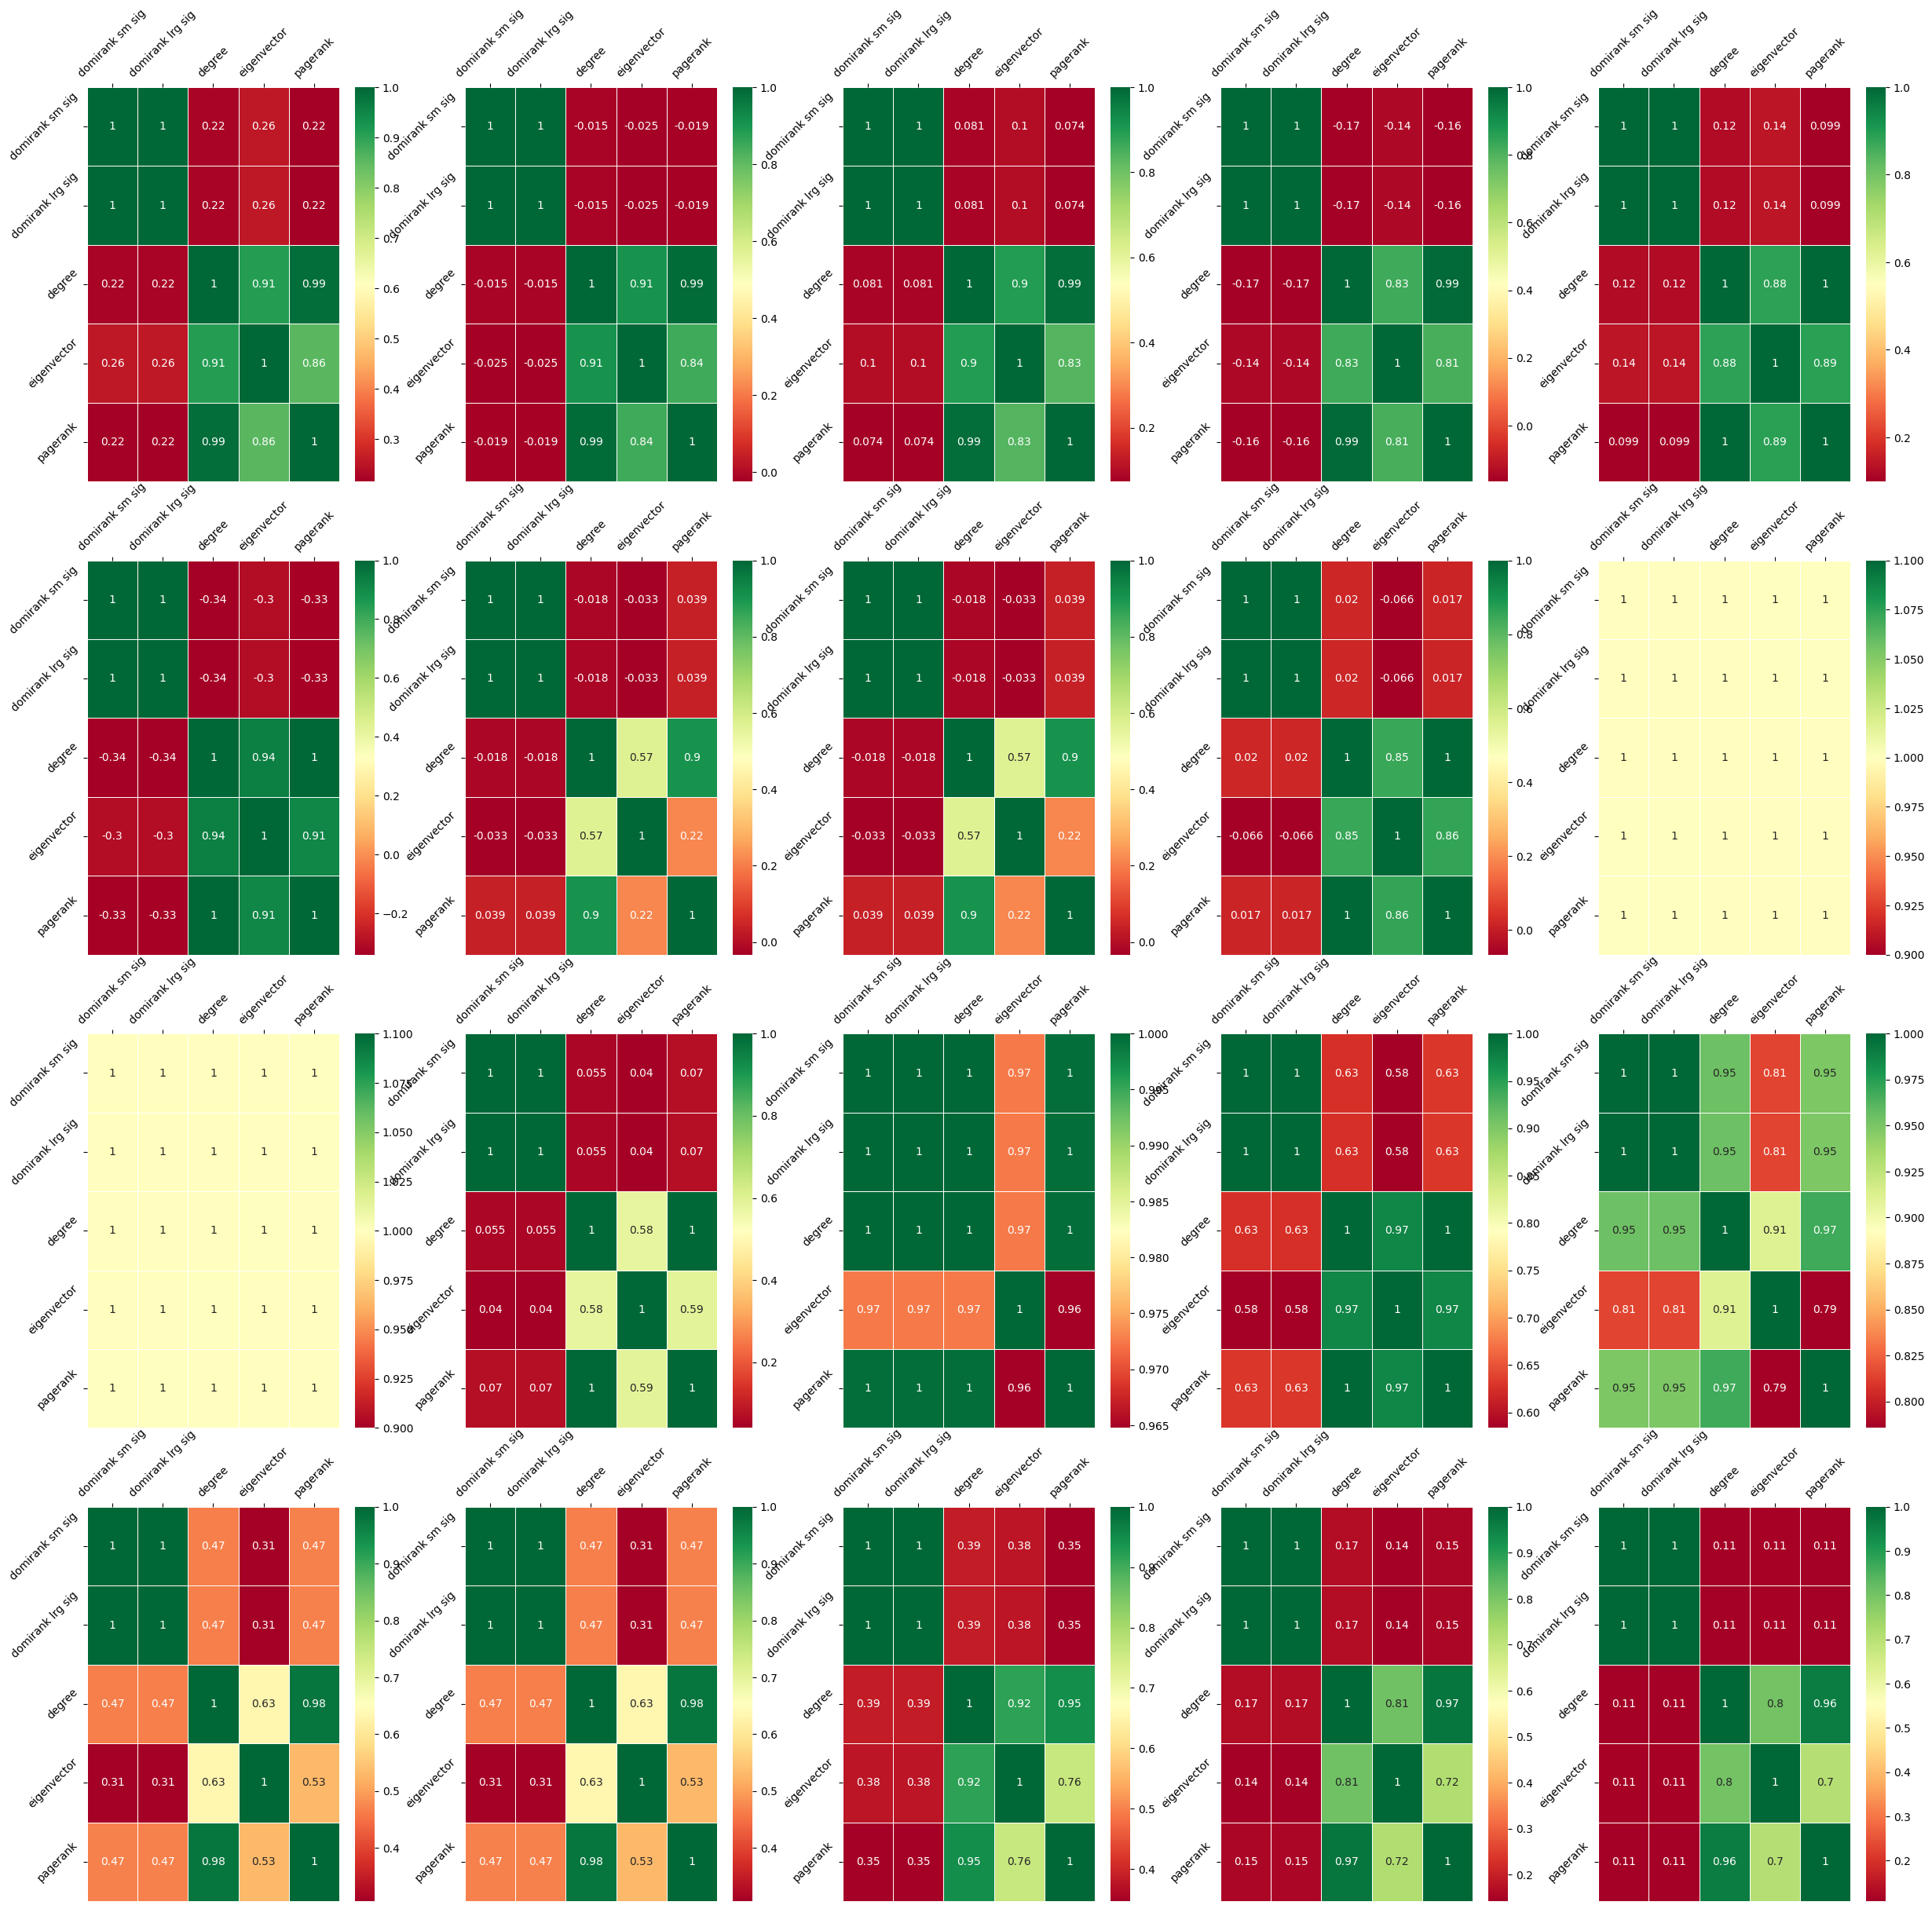

In [231]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    ax = sns.heatmap(vizzes[i].corr(), cmap="RdYlGn", annot=True, linewidth=.5)
    ax.set(xlabel="", ylabel="")
    ax.xaxis.tick_top()
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

# Work on power-iteration version of domirank < faster solution for large networks >

In [135]:
def domirank_power_iter(G: nx.Graph,
            sigma: float,
            theta: float = 1,
            max_iter: int = 100,
            tol: float = 1.0e-6,
            nstart: dict = None,
            weight: str = "weight",
            dangling: dict = None,
            ) -> dict:
    """Returns the DomiRank centrality of each of the nodes in the graph.

    DomiRank quantifies the dominance of the networks’
    nodes in their respective neighborhoods. This power iteration
    implementation is very similar pagerank.

    Parameters:
    ----------
     G : graph
      A NetworkX graph.

    sigma: float
        competition factor bounded between (0, -1/λ_N),
        where λ_N represents the minimum eigenvector of A.

    theta: float, optional
        optional weight parameter to scale the domiranks ("threshold for domination" in reference paper).

    max_iter : integer, optional
        Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.
      The iteration will stop after a tolerance of ``len(G) * tol`` is reached.

    nstart : dictionary, optional
      Starting value of DomiRank iteration for each node.

    weight : key, optional
        Edge data key to use as weight.  If None weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified) This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.


    Returns
    -------
    domirank : dictionary
       Dictionary of nodes with DomiRank as value.

    Examples
    --------
    >>> G = nx.erdos_renyi_graph(n=5, p=0.5)
    >>> sigma = 0.5
    >>> domi = nx.domirank(A, sigma)


     References
    ----------
    .. [1] M. Engsig, A. Tejedor, Y. Moreno, E. Foufoula-Georgiou, C. Kasmi,
       "DomiRank Centrality: revealing structural fragility of complex networks via node dominance."
       https://arxiv.org/abs/2305.09589
    """
    import numpy as np
    import scipy as sp

    # Get number of nodes
    N = len(G)
    if N == 0:
        return {}

    # get Adjacency matrix
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, weight=weight, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    # TODO: csr_array
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A

    # initial vector
    if nstart is None:
        x = np.repeat(1.0 / N, N)
    else:
        x = np.array([nstart.get(n, 0) for n in nodelist], dtype=float)
        x /= x.sum()

    # Dangling nodes -
    if dangling is None:
        dangling_weights = p
    else:
        # Convert the dangling dictionary into an array in nodelist order
        dangling_weights = np.array([dangling.get(n, 0) for n in nodelist], dtype=float)
        dangling_weights /= dangling_weights.sum()
    is_dangling = np.where(S == 0)[0]



    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        # x = (sigma * A) @ (theta * np.ones(N) - xlast)
        x = (sigma * A) @ (theta * np.ones(N) - sum(x[is_dangling]) * dangling_weights)
        # check convergence, l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, x)))
    raise nx.PowerIterationFailedConvergence(max_iter)


# Test DomiRank on a G(n, p) ER graph

In [9]:
N = 32
G = nx.erdos_renyi_graph(n=N, p=0.5)
Gpos = nx.spring_layout(G)
sigma = 0.1

In [137]:
# FIX: the solution is supposed to be Nx1 but I'm getting an NxN output
dr = domirank(G, sigma)
dr

{0: 0.7350121290975861,
 1: 0.5204742578521877,
 2: 0.7597527742042431,
 3: 0.4815702609329868,
 4: 0.5254544428229491,
 5: 0.5739890030887643,
 6: 0.6784990122380059,
 7: 0.5054725885200229,
 8: 0.5887037103233529,
 9: 0.5515048192421784,
 10: 0.3748243898185053,
 11: 0.7042184380101756,
 12: 0.4122096110472086,
 13: 0.36038857833501176,
 14: 0.3367077497651467,
 15: 0.5069808305728615,
 16: 0.7319858770642084,
 17: 0.47866777770376,
 18: 0.6647947166168928,
 19: 0.637693402768726,
 20: 0.5799045782979937,
 21: 0.31791563853691684,
 22: 0.6556062730672814,
 23: 0.7809295897279293,
 24: 0.582799675061042,
 25: 0.5530138262016076,
 26: 0.6993624720459887,
 27: 0.7068926316432818,
 28: 0.5881461864812539,
 29: 0.6251877339199449,
 30: 0.6870154991026394,
 31: 0.41422194644242794}

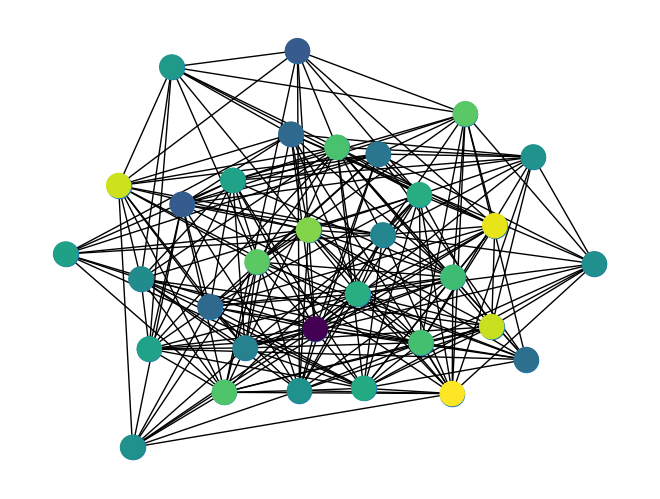

In [138]:
nx.draw(G, pos=Gpos)
nx.draw_networkx_nodes(G, pos=Gpos, node_color=list(out.values()))

# Test 7x7 Grid

In [144]:
grid = nx.grid_2d_graph(7, 7)
pos = nx.spring_layout(grid)
dr_grid = domirank(grid, sigma)
dr_grid

{0: 0.15347989620443914,
 1: 0.23260051897780507,
 2: 0.22511177476231375,
 3: 0.2258979486528504,
 4: 0.2251117747623139,
 5: 0.23260051897780507,
 6: 0.15347989620443903,
 7: 0.23260051897780498,
 8: 0.2954031392551976,
 9: 0.2903837847462071,
 10: 0.2907969639468693,
 11: 0.29038378474620685,
 12: 0.29540313925519757,
 13: 0.23260051897780498,
 14: 0.22511177476231392,
 15: 0.2903837847462071,
 16: 0.2848502745735494,
 17: 0.285364842386045,
 18: 0.2848502745735494,
 19: 0.2903837847462071,
 20: 0.22511177476231384,
 21: 0.22589794865285034,
 22: 0.2907969639468691,
 23: 0.28536484238604515,
 24: 0.28585406304558214,
 25: 0.28536484238604504,
 26: 0.2907969639468691,
 27: 0.22589794865285043,
 28: 0.22511177476231384,
 29: 0.29038378474620696,
 30: 0.2848502745735495,
 31: 0.28536484238604526,
 32: 0.28485027457354967,
 33: 0.2903837847462068,
 34: 0.2251117747623137,
 35: 0.23260051897780487,
 36: 0.29540313925519773,
 37: 0.2903837847462071,
 38: 0.290796963946869,
 39: 0.29038378

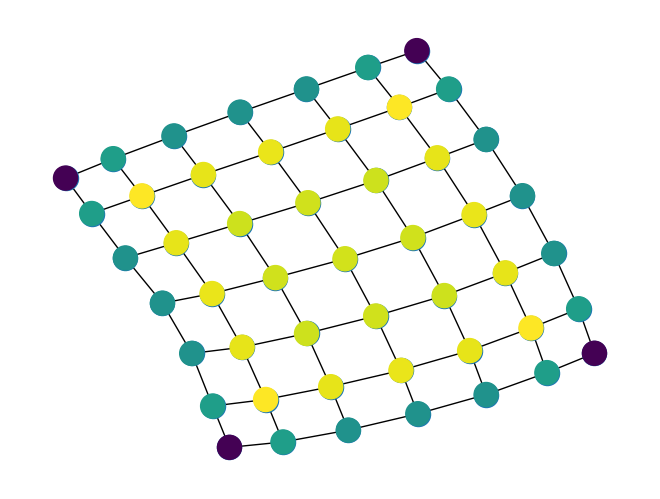

In [145]:
# Note: this color coding doesn't match the 2d lattice from the paper ...
nx.draw(grid, pos=pos)
nx.draw_networkx_nodes(grid, pos=pos, node_color=list(dr_grid.values()))

# Power Iteration 
- faster than matrix inverse for A large, sparse

In [2]:
import numpy as np

def power_iteration(A, num_iterations: int):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

In [3]:
power_iteration(np.array([[0.5, 0.5], [0.2, 0.8]]), 10)

array([0.70710973, 0.70710383])

# Can I just use the results from Pagerank as inputs to DomiRank?

In [4]:
from networkx import pagerank

In [10]:
pagerank(G)

{0: 0.029814844235113342,
 1: 0.03340319335913146,
 2: 0.02796184243442101,
 3: 0.037182739033218504,
 4: 0.033627462650365966,
 5: 0.026152084516663912,
 6: 0.024114211084770455,
 7: 0.03172214187513066,
 8: 0.037265824113316415,
 9: 0.03701398884657528,
 10: 0.024476579093723378,
 11: 0.026319744034525708,
 12: 0.02614846902983583,
 13: 0.03892430839477054,
 14: 0.035274050482407546,
 15: 0.024544184955441656,
 16: 0.03540572990249874,
 17: 0.028106199772900298,
 18: 0.024536025889097073,
 19: 0.03725927465052699,
 20: 0.02627041025838361,
 21: 0.029864849269857448,
 22: 0.03358808969755283,
 23: 0.03527794389217573,
 24: 0.03162499055178515,
 25: 0.03174088002658418,
 26: 0.03531715630275556,
 27: 0.026301896244378408,
 28: 0.028204965967536477,
 29: 0.03172706706091352,
 30: 0.035611342601195424,
 31: 0.03521750977244688}

In [ ]:
def corr_styler(styler):

    styler.set_caption("Correlation")
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdYlGn")
    styler.format(precision=2)

    return styler


df.corr().style.pipe(corr_styler)